# 0. Imports

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# 1. Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# 2. First Row Info

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9b09f846d0>,
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397'}

In [10]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9b09f84fd0>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

# 3. Exploratory Precipitation Analysis

### 3.1 Most Recent and Earliest Dates

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [12]:
session.query(Measurement.date).order_by(Measurement.date.asc()).first().date

'2010-01-01'

### 3.2 Data from Year Ago

In [13]:
year_ago = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [18]:
sel = [Measurement.date, 
       func.avg(Measurement.prcp)]
year_prcp = session.query(*sel).\
    filter(Measurement.date >= year_ago).\
    group_by(Measurement.date).all()
year_prcp

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

### 3.3 Save the query results as a Pandas DataFrame and set the index to the date column

In [19]:
df = pd.DataFrame(year_prcp, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.head()

,prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


### 3.4 Sort the dataframe by date

In [20]:
df2 = df.sort_values('date', ascending=False)
df2.head()

,prcp
date,
2017-08-23,0.132500
2017-08-22,0.166667
2017-08-21,0.193333
2017-08-20,0.005000
2017-08-19,0.030000


### 3.5 Use Pandas Plotting with Matplotlib to plot the data

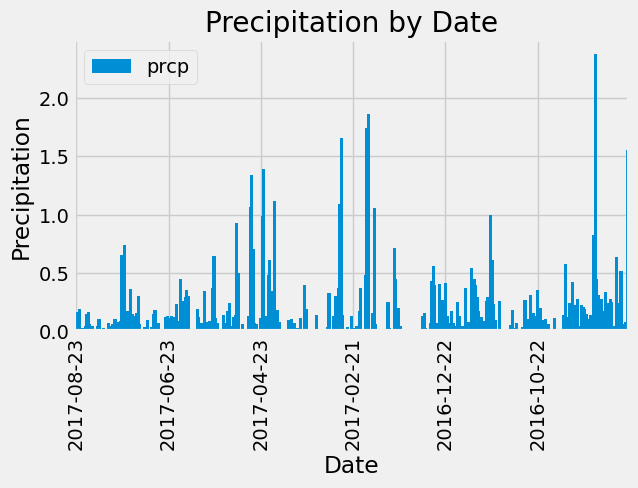

In [21]:
df2.plot.bar(width=2)
plt.tight_layout()

plt.locator_params(axis='x', nbins=6)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation by Date')

plt.show()

### 3.6 Use Pandas to calcualte the summary statistics for the precipitation data

In [22]:
df2.describe()

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# 4. Exploratory Station Analysis

### 4.1 Distinct Number of Stations

In [23]:
session.query(Station).distinct().count()

9

### 4.2 Most Active Station

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station,
       func.count(Measurement.station)]
most_active = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### 4.3 Stats for Most Active Station

In [25]:
most_active_station = most_active[0][0]
most_active_station

'USC00519281'

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
ma_averages = session.query(*sel).\
    filter(Measurement.station == most_active_station).all()
ma_averages

[(54.0, 85.0, 71.66378066378067)]

In [27]:
print(f"min temp: {ma_averages[0][0]}")
print(f"max temp: {ma_averages[0][1]}")
print(f"avg temp: {ma_averages[0][2]}")

min temp: 54.0
max temp: 85.0
avg temp: 71.66378066378067


### 4.4 Last 12 Months of Temperature for Most Active Station

In [28]:
sel = [Measurement.station, 
       Measurement.tobs]
year_temp = session.query(*sel).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.station == most_active_station).\
    group_by(Measurement.date).all()
year_temp

[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [29]:
df_temp = pd.DataFrame(year_temp, columns=['station', 'temp'])
df_temp.set_index('station', inplace=True)
df_temp.head()

,temp
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


### 4.5 Create Histogram

Text(0.5, 1.0, 'Histogram of Temperatures for Station USC00519281')

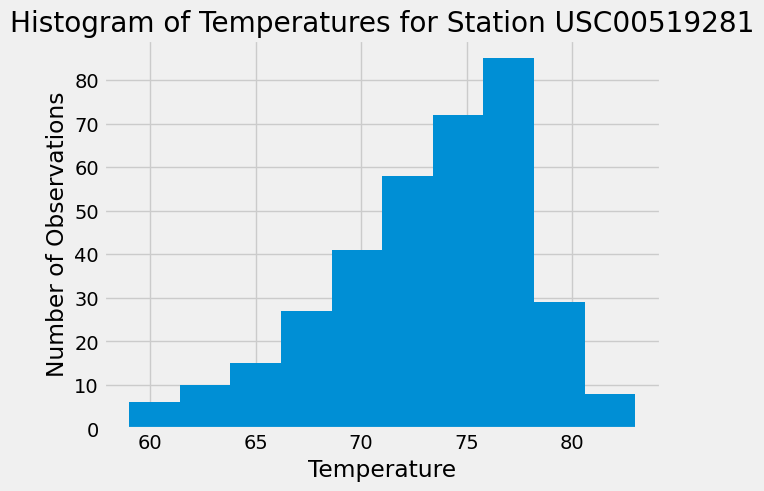

In [30]:
plt.hist(df_temp)

plt.xlabel("Temperature")
plt.ylabel("Number of Observations")
plt.title("Histogram of Temperatures for Station USC00519281")

# 5. Close session

In [31]:
# Close Session
session.close()